In [174]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
from math import sin, cos, sqrt, atan2, radians
import warnings
%matplotlib inline
# Import API key
from api_keys import g_key

In [154]:
population = pd.read_csv("../Data/pop-by-zip-code.csv",converters={'zip_code':str})
population.head()
len(population)

33120

In [155]:
ziplatlng = pd.read_csv("../Data/zipCodeGeoCode.csv",converters={'Zip':str})
ziplatlng.head()
#len(ziplatlng)

,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,05769,Salisbury,VT,43.914026,-73.107030,-5,1,"43.914026, -73.10703"
1,01085,Westfield,MA,42.133642,-72.750290,-5,1,"42.133642, -72.75029"
2,01340,Colrain,MA,42.673371,-72.731040,-5,1,"42.673371, -72.73104"
3,25728,Huntington,WV,38.413384,-82.277401,-5,1,"38.413384, -82.277401"
4,26035,Colliers,WV,40.352943,-80.555850,-5,1,"40.352943, -80.55585"


In [156]:
census_pop=pd.merge(population, ziplatlng, how='inner', left_on='zip_code', right_on='Zip', left_index=False, right_index=False)
census_pop

,zip_code,y-2016,y-2015,y-2014,y-2013,y-2012,y-2011,y-2010,aggregate,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,00601,17800,17982,18088,18450,18544,18533,18570,127967,00601,Adjuntas,PR,18.180103,-66.74947,-4,0,"18.180103, -66.74947"
1,00602,39716,40260,40859,41302,41640,41930,41520,287227,00602,Aguada,PR,18.363285,-67.18024,-4,0,"18.363285, -67.18024"
2,00603,51565,52408,53162,53683,54540,54475,54689,374522,00603,Aguadilla,PR,18.448619,-67.13422,-4,0,"18.448619, -67.13422"
3,00606,6320,6331,6415,6591,6593,6386,6615,45251,00606,Maricao,PR,18.182151,-66.95880,-4,0,"18.182151, -66.9588"
4,00610,27976,28328,28805,28963,29141,29111,29016,201340,00610,Anasco,PR,18.288319,-67.13604,-4,0,"18.288319, -67.13604"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32898,99923,0,13,12,81,77,116,87,386,99923,Hyder,AK,55.941442,-130.05450,-9,1,"55.941442, -130.0545"
32899,99925,908,826,728,668,673,689,819,5311,99925,Klawock,AK,55.555164,-133.07316,-9,1,"55.555164, -133.07316"
32900,99926,1667,1711,1622,1630,1624,1488,1460,11202,99926,Metlakatla,AK,55.123897,-131.56883,-9,1,"55.123897, -131.56883"
32901,99927,81,123,131,111,75,67,94,682,99927,Point Baker,AK,56.337957,-133.60689,-9,1,"56.337957, -133.60689"


In [157]:
census_pop['y-2010'].sum()
census_pop.columns

Index(['zip_code', 'y-2016', 'y-2015', 'y-2014', 'y-2013', 'y-2012', 'y-2011',
       'y-2010', 'aggregate', 'Zip', 'City', 'State', 'Latitude', 'Longitude',
       'Timezone', 'Daylight savings time flag', 'geopoint'],
      dtype='object')

In [158]:
pop_census=census_pop[['zip_code','City', 'State', 'Latitude', 'Longitude','y-2016', 'y-2015', 'y-2014', 'y-2013', 'y-2012', 'y-2011','y-2010', 'aggregate']].copy()
pop_census['y-2010'].sum()

309022191

309022191    306986670    309404089     311686750     314131748     316413378    318335348


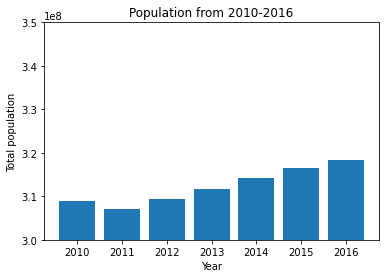

In [175]:
x_axis=[2010,2011,2012,2013,2014,2015,2016]
pop2010=pop_census['y-2010'].sum()
pop2011=pop_census['y-2011'].sum()
pop2012=pop_census['y-2012'].sum()
pop2013=pop_census['y-2013'].sum()
pop2014=pop_census['y-2014'].sum()
pop2015=pop_census['y-2015'].sum()
pop2016=pop_census['y-2016'].sum()
print(f"{pop2010}    {pop2011}    {pop2012}     {pop2013}     {pop2014}     {pop2015}    {pop2016}")
y_axis=[pop2010,pop2011,pop2012,pop2013,pop2014,pop2015,pop2016]
plt.bar(x_axis,y_axis)
plt.ylim(300000000,350000000)
plt.title('Population from 2010-2016')
plt.xlabel('Year')
plt.ylabel('Total population')
plt.rcParams["figure.figsize"] = [10, 5]
plt.savefig("../Figures/US population 2010-2016.png")
plt.show()


In [176]:
reactor = pd.read_csv('../Data/Reactors.csv')
reactor.head()

,Name,Number of units,City,State,Lat,Long,Open,License Expires
0,Browns Ferry Nuclear Plant,3,Athens,AL,34.812790,-86.961891,1973,2033
1,Farley,2,Columbia,AL,33.543098,-86.879112,1977,2037
2,Arkansas Nuclear One,2,London,AR,35.330898,-93.247162,1974,2034
3,Palo Verde,3,Wintersburg,AZ,33.421180,-112.867740,1985,2045
4,Diablo Canyon,2,Avila Beach,CA,35.182129,-120.732712,1984,2024


In [177]:
reactor.dtypes

Name                object
Number of units      int64
City                object
State               object
Lat                float64
Long               float64
Open                 int64
License Expires      int64
dtype: object

In [178]:
Age_reactor=2020-reactor['Open']
Age_reactor
reactor['Age']=Age_reactor
reactor.sort_values(by='Age', ascending=False)


,Name,Number of units,City,State,Lat,Long,Open,License Expires,Age
35,Ginna,1,Ontario,NY,43.220909,-77.283340,1969,2029,51
56,Point Beach,2,Two Rivers,WI,44.153648,-87.568367,1970,2030,50
47,Robinson,1,Hartsville,SC,34.369850,-80.084534,1970,2030,50
23,Monticello,1,Monticello,MN,45.304661,-93.794907,1970,2030,50
16,Quad Cities,2,Cordova,IL,41.677830,-90.316078,1972,2032,48
54,Surry,2,Surry,VA,37.138279,-76.834991,1972,2032,48
7,Turkey Point,2,Homestead,FL,25.468721,-80.477554,1972,2052,48
46,Oconee,3,Seneca,SC,34.685219,-82.949829,1973,2033,47
43,Peach Bottom,2,Delta,PA,39.726582,-76.326340,1973,2053,47
36,Indian Point,2,Buchanan,NY,41.261238,-73.939171,1973,2024,47


In [179]:
reactor[reactor['Age']==reactor['Age'].max()]

,Name,Number of units,City,State,Lat,Long,Open,License Expires,Age
35,Ginna,1,Ontario,NY,43.220909,-77.28334,1969,2029,51


# Analysis
* The reactor which has been operating the longest is Ginna in Ontario,NY. It has been operational for 51 years.

In [180]:
reactor[reactor['Age']==reactor['Age'].min()]

,Name,Number of units,City,State,Lat,Long,Open,License Expires,Age
15,La Salle,2,Marseilles,IL,41.330502,-88.708298,2016,2042,4


# Analysis
* The newest ractor is La Salle in Marseilles.IL which opened in 2016.

In [181]:
reactor['Age'].mean()

39.54385964912281

In [182]:
reactor.groupby(['Number of units']).count()

,Name,City,State,Lat,Long,Open,License Expires,Age
Number of units,,,,,,,,
1,21,21,21,21,21,21,21,21
2,33,33,33,33,33,33,33,33
3,3,3,3,3,3,3,3,3


In [183]:
reactor.head()

,Name,Number of units,City,State,Lat,Long,Open,License Expires,Age
0,Browns Ferry Nuclear Plant,3,Athens,AL,34.812790,-86.961891,1973,2033,47
1,Farley,2,Columbia,AL,33.543098,-86.879112,1977,2037,43
2,Arkansas Nuclear One,2,London,AR,35.330898,-93.247162,1974,2034,46
3,Palo Verde,3,Wintersburg,AZ,33.421180,-112.867740,1985,2045,35
4,Diablo Canyon,2,Avila Beach,CA,35.182129,-120.732712,1984,2024,36


# Analysis 
* Of the 96 operational reactors 3 reactors have 3 units,33 reactors have 2 units and 21 reactors have 1 units

In [184]:
bins=[1960,1969,1979,1989,1999,2009,2020]
group_names=["1960-69","1970-79","1980-89","1990-99","2000-2010","2010-2020"]
reactor["Decade"]=pd.cut(reactor["Open"], bins, labels=group_names, include_lowest=True)
reactor

,Name,Number of units,City,State,Lat,Long,Open,License Expires,Age,Decade
0,Browns Ferry Nuclear Plant,3,Athens,AL,34.812790,-86.961891,1973,2033,47,1970-79
1,Farley,2,Columbia,AL,33.543098,-86.879112,1977,2037,43,1970-79
2,Arkansas Nuclear One,2,London,AR,35.330898,-93.247162,1974,2034,46,1970-79
3,Palo Verde,3,Wintersburg,AZ,33.421180,-112.867740,1985,2045,35,1980-89
4,Diablo Canyon,2,Avila Beach,CA,35.182129,-120.732712,1984,2024,36,1980-89
5,Millstone,2,Waterford,CT,41.354240,-72.164818,1975,2035,45,1970-79
6,Saint Lucie,2,Jensen Beach,FL,27.244471,-80.225273,1976,2036,44,1970-79
7,Turkey Point,2,Homestead,FL,25.468721,-80.477554,1972,2052,48,1970-79
8,Hatch,2,Baxley,GA,31.780180,-82.346939,1974,2034,46,1970-79
9,Vogtle,2,Waynesboro,GA,33.090038,-82.015846,1987,2047,33,1980-89


In [185]:
reactor.groupby(['Decade']).count()

,Name,Number of units,City,State,Lat,Long,Open,License Expires,Age
Decade,,,,,,,,,
1960-69,1,1,1,1,1,1,1,1,1
1970-79,27,27,27,27,27,27,27,27,27
1980-89,23,23,23,23,23,23,23,23,23
1990-99,5,5,5,5,5,5,5,5,5
2000-2010,0,0,0,0,0,0,0,0,0
2010-2020,1,1,1,1,1,1,1,1,1


# Analysis
* The number of reactors that opened in each decade are as follows

        * 1960-69         1   
        * 1970-79	     27	
        * 1980-89	     23	
        * 1990-99	     5	
        * 2000-2010	   0    
        * 2010-2020	   1


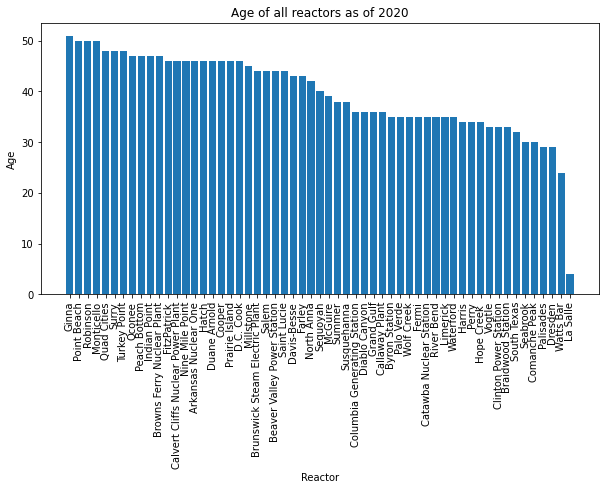

In [186]:
reactor.sort_values(by='Age', ascending=False, inplace=True)
x_axis=reactor['Name']
y_axis=reactor['Age']
plt.bar(x_axis,y_axis)
plt.xticks(rotation="vertical")
plt.title('Age of all reactors as of 2020')
plt.xlabel('Reactor')
plt.ylabel('Age')
plt.rcParams["figure.figsize"] = [20, 5]
#plt.figure(figsize=(20,10))
plt.savefig("../Figures/U.S. Reactor age.png")

plt.show()

In [73]:
def distanceCalculator(lat1Reactor, long1Reactor, lat2City, long2City):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1Reactor)
    lon1 = radians(long1Reactor)
    lat2 = radians(lat2City)
    lon2 = radians(long2City)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance


In [80]:
reactor_df=reactor[['Name','Number of units','City','State','Lat','Long','Open']].copy()
#reactor_df.drop_duplicates(inplace=True,ignore_index=True)

len(reactor_df)
reactor_df['Name']
reactor_df.shape()

,Name,Number of units,City,State,Lat,Long,Open
21,Ginna,1,Ontario,NY,43.220909,-77.283340,1969
31,Monticello,1,Monticello,MN,45.304661,-93.794907,1970
43,Robinson,1,Hartsville,SC,34.369850,-80.084534,1970
39,Point Beach,2,Two Rivers,WI,44.153648,-87.568367,1970
41,Quad Cities,2,Cordova,IL,41.677830,-90.316078,1972


In [78]:
census_pop.columns

Index(['zip_code', 'y-2016', 'y-2015', 'y-2014', 'y-2013', 'y-2012', 'y-2011',
       'y-2010', 'aggregate', 'Zip', 'City', 'State', 'Latitude', 'Longitude',
       'Timezone', 'Daylight savings time flag', 'geopoint'],
      dtype='object')

In [79]:
census_pop_df=census_pop[['zip_code', 'y-2016', 'y-2015', 'y-2014', 'y-2013', 'y-2012', 'y-2011',
       'y-2010', 'aggregate', 'Zip', 'City', 'State', 'Latitude', 'Longitude']].copy()
census_pop_df

,zip_code,y-2016,y-2015,y-2014,y-2013,y-2012,y-2011,y-2010,aggregate,Zip,City,State,Latitude,Longitude
0,00601,17800,17982,18088,18450,18544,18533,18570,127967,00601,Adjuntas,PR,18.180103,-66.74947
1,00602,39716,40260,40859,41302,41640,41930,41520,287227,00602,Aguada,PR,18.363285,-67.18024
2,00603,51565,52408,53162,53683,54540,54475,54689,374522,00603,Aguadilla,PR,18.448619,-67.13422
3,00606,6320,6331,6415,6591,6593,6386,6615,45251,00606,Maricao,PR,18.182151,-66.95880
4,00610,27976,28328,28805,28963,29141,29111,29016,201340,00610,Anasco,PR,18.288319,-67.13604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32898,99923,0,13,12,81,77,116,87,386,99923,Hyder,AK,55.941442,-130.05450
32899,99925,908,826,728,668,673,689,819,5311,99925,Klawock,AK,55.555164,-133.07316
32900,99926,1667,1711,1622,1630,1624,1488,1460,11202,99926,Metlakatla,AK,55.123897,-131.56883
32901,99927,81,123,131,111,75,67,94,682,99927,Point Baker,AK,56.337957,-133.60689


In [83]:
lat=reactor_df['Lat']
lng=reactor_df['Long']
reactor_city=reactor_df['City']
reactor_state=reactor_df['State']
reactor_name=reactor_df['Name']
reactor_units=reactor_df['Number of units']

frames=[]
df_n=pd.DataFrame()
df_o=pd.DataFrame()
for i in range(len(reactor)):
    for index, row in census_pop_df.iterrows():
     #     warnings.filterwarnings('ignore')
        latReactor=lat[i]
        longReactor=lng[i]
        cityreactor=reactor_city[i]
        statereactor=reactor_state[i]
        namereactor=reactor_name[i]
        unitreactor=reactor_units[i]
        latCity = row['Latitude']
        longCity = row['Longitude']
        dist = distanceCalculator(latReactor, longReactor, latCity, longCity)
        census_pop_df.loc[index, 'Distance from Reactor'] = dist
        census_pop_df.loc[index, 'Reactor_lat']=latReactor
        census_pop_df.loc[index, 'Reactor_lng']=longReactor
        census_pop_df.loc[index, 'Reactor_city']=cityreactor
        census_pop_df.loc[index, 'Reactor_state']=statereactor
        census_pop_df.loc[index, 'Reactor_name']=namereactor
        census_pop_df.loc[index, 'Reactor_units']=unitreactor

    census_pop_df.sort_values(by='Distance from Reactor', inplace=True)
    df_o=census_pop_df[census_pop_df['Distance from Reactor']<=241.402]
    frames.append(df_o)
    #df_n.append(df_o)
    census_pop_df=census_pop_df[census_pop_df['Distance from Reactor']>241.402]
    print(f"{i}      {latReactor}     {longReactor}")
    #print(frames)

0      35.330898     -93.247162


C:\Users\syeda\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
<ipython-input-83-41059e6d0d97>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census_pop_df.sort_values(by='Distance from Reactor', inplace=True)


1      40.629372     -80.421249
2      41.226929     -88.264282
3      34.81279     -86.96189100000001
4      33.921562     -78.020271
5      42.125408     -89.25595899999999
6      38.844390999999995     -91.94465600000001
7      38.351631     -76.436172
8      34.99411     -81.241982
9      40.14806     -88.96392800000001
10      46.280418     -119.2752
11      32.234669     -97.755501
12      40.398571000000004     -95.66011800000001
13      41.94355     -86.55506899999999
14      41.486938     -83.009552
15      35.182128999999996     -120.732712
16      41.357254     -88.421181
17      42.065239     -91.795807
18      33.543098     -86.879112
19      41.652805     -83.537865
20      43.465389     -76.430611
21      43.220909000000006     -77.28334
22      31.960449     -90.98191800000001
23      35.680981     -78.93562299999999
24      31.780179999999998     -82.346939
25      39.502499     -75.458504
26      41.261238     -73.939171
27      41.330502     -88.708298
28      40.231

In [92]:
len(frames)

57

In [93]:
popnear_reactor = pd.concat(frames)
popnear_reactor

,zip_code,y-2016,y-2015,y-2014,y-2013,y-2012,y-2011,y-2010,aggregate,Zip,...,State,Latitude,Longitude,Distance from Reactor,Reactor_lat,Reactor_lng,Reactor_city,Reactor_state,Reactor_name,Reactor_units
25047,72847,2678,2650,2457,2688,2485,2447,2850,18255,72847,...,AR,35.380528,-93.28528,6.513935,35.330898,-93.247162,London,AR,Arkansas Nuclear One,2.0
25037,72835,737,725,720,759,908,755,923,5527,72835,...,AR,35.299773,-93.35469,10.355282,35.330898,-93.247162,London,AR,Arkansas Nuclear One,2.0
25045,72845,1244,1214,971,1186,1096,1222,1216,8149,72845,...,AR,35.376739,-93.35706,11.197992,35.330898,-93.247162,London,AR,Arkansas Nuclear One,2.0
25025,72801,19859,19233,19467,18252,17903,17849,18685,131248,72801,...,AR,35.278429,-93.13682,11.592383,35.330898,-93.247162,London,AR,Arkansas Nuclear One,2.0
25026,72802,21390,21052,21275,21872,21886,22082,20973,150530,72802,...,AR,35.308848,-93.10909,12.768701,35.330898,-93.247162,London,AR,Arkansas Nuclear One,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25491,74131,3241,3207,3291,3240,3202,3088,2775,22044,74131,...,OK,36.057536,-96.07119,239.458292,38.194569,-95.744698,Burlington,KS,Wolf Creek,1.0
25493,74133,45377,44901,44226,44107,43765,43606,43414,309396,74133,...,OK,36.043090,-95.88417,239.628052,38.194569,-95.744698,Burlington,KS,Wolf Creek,1.0
25492,74132,8604,8459,8096,8128,7489,7418,7543,55737,74132,...,OK,36.051893,-96.02752,239.645362,38.194569,-95.744698,Burlington,KS,Wolf Creek,1.0
23054,67035,939,1020,946,1092,1014,1144,970,7125,67035,...,KS,37.655003,-98.39643,240.269289,38.194569,-95.744698,Burlington,KS,Wolf Creek,1.0


In [94]:
popnear_reactor.to_csv('../Data/popdata150milesofreactor.csv')

In [95]:
popnear_reactor['y-2010'].sum()

221689417

In [99]:
mile_50=popnear_reactor[popnear_reactor['Distance from Reactor']<=80.4672]
mile_100=popnear_reactor[popnear_reactor['Distance from Reactor']<=160.934]
mile_150=popnear_reactor[popnear_reactor['Distance from Reactor']<=241.402]


23126

In [152]:
m_50=mile_50[['y-2016', 'y-2015', 'y-2014', 'y-2013', 'y-2012', 'y-2011','y-2010']].sum()
m_100=mile_100[['y-2016', 'y-2015', 'y-2014', 'y-2013', 'y-2012', 'y-2011','y-2010']].sum()
m_150=mile_150[['y-2016', 'y-2015', 'y-2014', 'y-2013', 'y-2012', 'y-2011','y-2010']].sum()
m_more150=census_pop[['y-2016', 'y-2015', 'y-2014', 'y-2013', 'y-2012', 'y-2011','y-2010']].sum()-m_150
totalpop=census_pop[['y-2016', 'y-2015', 'y-2014', 'y-2013', 'y-2012', 'y-2011','y-2010']].sum()
df1=pd.DataFrame({'within 50 miles':m_50})
df1['within 100 miles']=m_100
df1['within 150 miles']=m_150
df1['Greater than 150 miles']=m_more150
df1['Total Pop']=totalpop
df1['within 50 miles %']=(df1['within 50 miles']*100)/df1['Total Pop']
df1['within 100 miles %']=(df1['within 100 miles']*100)/df1['Total Pop']
df1['within 150 miles %']=(df1['within 150 miles']*100)/df1['Total Pop']

df1


,within 50 miles,within 100 miles,within 150 miles,Greater than 150 miles,Total Pop,within 50 miles %,within 100 miles %,within 150 miles %
y-2016,30615091,119152207,228035058,90300290,318335348,9.617245,37.429776,71.633596
y-2015,30413824,118398715,226720914,89692464,316413378,9.612054,37.418998,71.653391
y-2014,30196063,117518997,225168958,88962790,314131748,9.612547,37.410735,71.679784
y-2013,29969148,116613857,223523607,88163143,311686750,9.615150,37.413800,71.714183
y-2012,29744397,115746210,221983364,87420725,309404089,9.613447,37.409399,71.745453
y-2011,29519467,114831987,220345411,86641259,306986670,9.615879,37.406180,71.776866
y-2010,29720313,115555379,221689417,87332774,309022191,9.617534,37.393877,71.738996


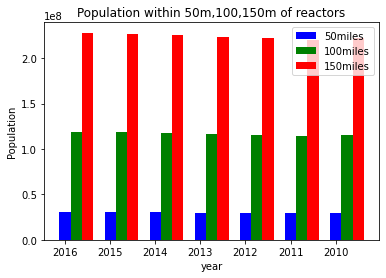

In [173]:
x_axis=np.arange(len(df1.index))
ticklocations=['2016','2015','2014','2013','2012','2011','2010']
plt.bar(x_axis+0.00,df1['within 50 miles'],color='b',width=0.25,label='50miles')
plt.bar(x_axis+0.25,df1['within 100 miles'],color='g',width=0.25,label='100miles')
plt.bar(x_axis+0.50,df1['within 150 miles'],color='r',width=0.25,label='150miles')
plt.xticks(x_axis, ticklocations)
plt.title('Population within 50m,100,150m of reactors')
plt.xlabel('year')
plt.ylabel('Population')
plt.legend()
plt.savefig("../Figures/Population around us reactors.png")

plt.show()

TypeError: 'Index' object is not callable